In [1]:
 pip install -U scikit-fuzzy 

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e0f766ed5b53c2ed2a90700d92670e64eb501532da3a149866affa79509ab045
  Stored in directory: c:\users\abeer al-talib\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

C:\Users\Abeer AL-Talib\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Abeer AL-Talib\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Abeer AL-Talib\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ValueError: Unexpected input: quality

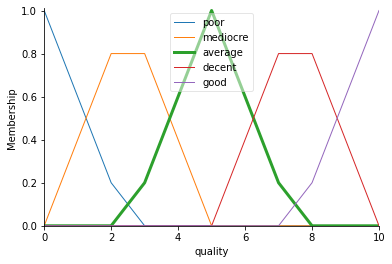

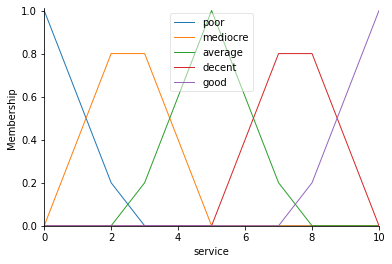

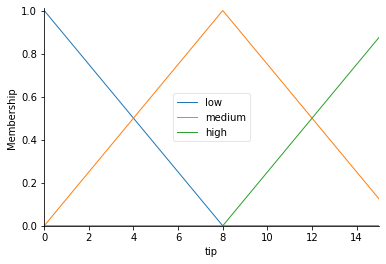

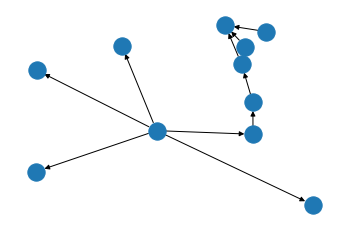

In [32]:

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 16, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(5)
service.automf(5)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 8])
tip['medium'] = fuzz.trimf(tip.universe, [0, 8, 16])
tip['high'] = fuzz.trimf(tip.universe, [8, 16, 16])


# You can see how these look with .view()
quality['average'].view()
service.view()
tip.view()


rule1 = ctrl.Rule(quality['poor']     and service['poor'], tip['low'])
rule2 = ctrl.Rule(quality['average']  and service['poor'], tip['low'])
rule3 = ctrl.Rule(quality['average']  and service['average'] , tip['medium'])
rule4 = ctrl.Rule(quality['average']  and service['good'], tip['medium'])
rule5= ctrl.Rule(quality['good']      and service['good'], tip['high'])

rule1.view()

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 3
tipping.input['service'] = 5

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)

